<a href="https://colab.research.google.com/github/Yoon-jeongwoo/repository/blob/main/Bearing1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
from datetime import datetime, time
import seaborn as sns

In [4]:
# 소스 파일 경로
source_file_path = '/content/drive/MyDrive/archive/phm2012.zip'
# 대상 파일 경로
target_file_path = '/content/archive.zip'
# 파일 복사
shutil.copyfile(source_file_path, target_file_path)
# ZIP 파일 경로
zip_file_path = '/content/archive.zip'
# 언집할 폴더 경로
target_folder_path = '/content/dataset'
# ZIP 파일 언집
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder_path)
# CSV 파일들이 있는 디렉토리 경로
directory_path = '/content/dataset/Test_set/Bearing1_3'
# 디렉토리 내의 모든 CSV 파일 경로를 가져오기
file_paths = glob.glob(directory_path + '/*.csv')

In [5]:


# 파일 경로를 순서대로 정렬
file_paths = sorted(file_paths)

# 파일들을 담을 빈 DataFrame 생성
combined_data = pd.DataFrame()

# acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]

# 각 파일을 순회하며 데이터를 불러온 뒤 빈 DataFrame에 추가
for file_path in acc_file_paths:
    df = pd.read_csv(file_path, index_col=None, header=None)  # 첫 번째 행을 인덱스로 사용하지 않음
    combined_data = pd.concat([combined_data, df], ignore_index=True, axis=0)

In [6]:
combined_data

,0,1,2,3,4,5
0,8,33,1,378160.0,0.092,0.044
1,8,33,1,378200.0,-0.025,0.432
2,8,33,1,378240.0,-0.104,0.008
3,8,33,1,378280.0,0.056,-0.264
4,8,33,1,378320.0,0.074,-0.195
...,...,...,...,...,...,...
4613115,13,33,11,477970.0,-0.566,0.255
4613116,13,33,11,478010.0,-0.528,0.779
4613117,13,33,11,478050.0,-0.732,0.532
4613118,13,33,11,478080.0,-0.284,-0.130


In [7]:
# Convert timestamp columns to integers and create a new DataFrame with these values
timestamp_integers = combined_data[[0, 1, 2, 3]].astype(int)
timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']
# Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
combined_data['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)
# Convert the 'timestamp' column to a Pandas datetime object
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'], format='%H:%M:%S.%f')

In [8]:
# Remove the date part from the 'timestamp' column
combined_data['timestamp'] = combined_data['timestamp'].dt.time

In [9]:
combined_data

,0,1,2,3,4,5,timestamp
0,8,33,1,378160.0,0.092,0.044,08:33:01.378160
1,8,33,1,378200.0,-0.025,0.432,08:33:01.378200
2,8,33,1,378240.0,-0.104,0.008,08:33:01.378240
3,8,33,1,378280.0,0.056,-0.264,08:33:01.378280
4,8,33,1,378320.0,0.074,-0.195,08:33:01.378320
...,...,...,...,...,...,...,...
4613115,13,33,11,477970.0,-0.566,0.255,13:33:11.477970
4613116,13,33,11,478010.0,-0.528,0.779,13:33:11.478010
4613117,13,33,11,478050.0,-0.732,0.532,13:33:11.478050
4613118,13,33,11,478080.0,-0.284,-0.130,13:33:11.478080


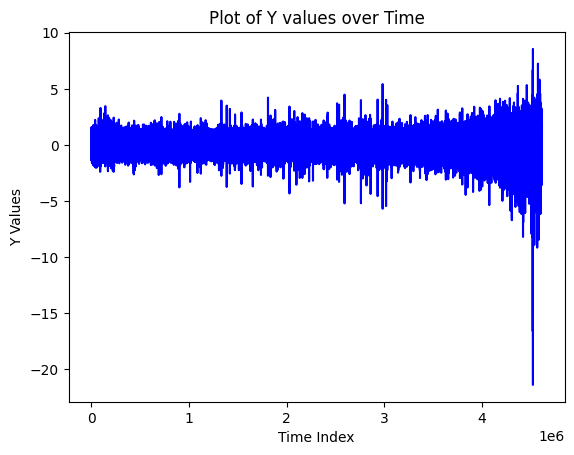

In [10]:
# Create a figure and axis
fig, ax = plt.subplots()

# Reset the index of the DataFrame
combined_data_reset = combined_data.reset_index(drop=True)

# Plot the data using integer index as x-axis
ax.plot(combined_data_reset.index, combined_data[4], color='blue')

# Customize the plot
ax.set_xlabel('Time Index')
ax.set_ylabel('Y Values')
ax.set_title('Plot of Y values over Time')

# Show the plot
plt.show()

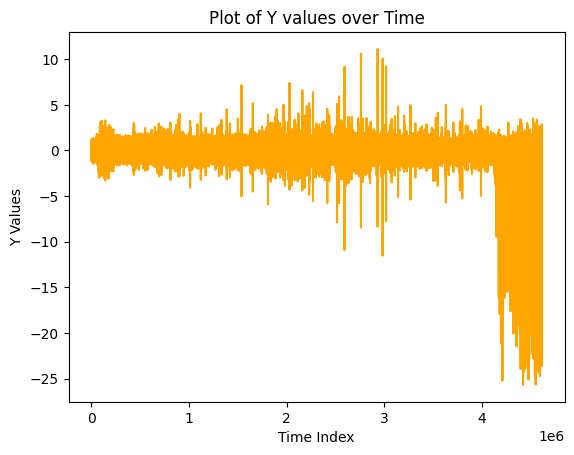

In [11]:
# Create a figure and axis
fig, ax = plt.subplots()

# Reset the index of the DataFrame
combined_data_reset = combined_data.reset_index(drop=True)

# Plot the data using integer index as x-axis
ax.plot(combined_data_reset.index, combined_data[5], color='orange')

# Customize the plot
ax.set_xlabel('Time Index')
ax.set_ylabel('Y Values')
ax.set_title('Plot of Y values over Time')

# Show the plot
plt.show()

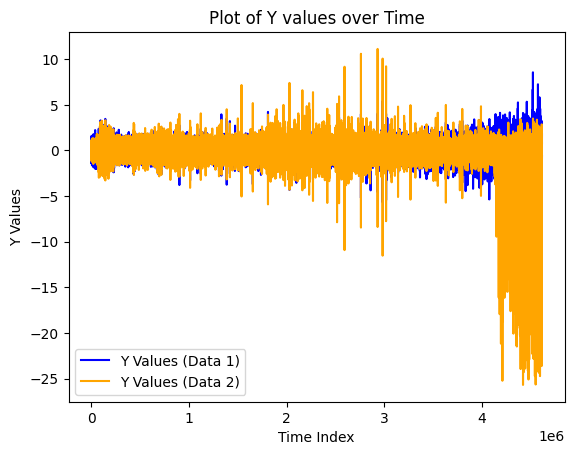

In [12]:
# Create a figure and axis
fig, ax = plt.subplots()

# Reset the index of the DataFrame
combined_data_reset = combined_data.reset_index(drop=True)

# Plot the data using integer index as x-axis
ax.plot(combined_data_reset.index, combined_data[4], color='blue', label='Y Values (Data 1)')
ax.plot(combined_data_reset.index, combined_data[5], color='orange', label='Y Values (Data 2)')

# Customize the plot
ax.set_xlabel('Time Index')
ax.set_ylabel('Y Values')
ax.set_title('Plot of Y values over Time')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [13]:
# 모든 데이터가 들어있는 파일을 불러옴
# CSV 파일들이 있는 디렉토리 경로
directory_path = '/content/dataset/Full_Test_Set/Bearing1_3'

# 디렉토리 내의 모든 CSV 파일 경로를 가져오기
file_paths = glob.glob(directory_path + '/*.csv')

# 파일 경로를 순서대로 정렬
file_paths = sorted(file_paths)

# 파일들을 담을 빈 DataFrame 생성
combined_data2 = pd.DataFrame()

# acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]

# 각 파일을 순회하며 데이터를 불러온 뒤 빈 DataFrame에 추가
for file_path in acc_file_paths:
    df2 = pd.read_csv(file_path, index_col=None, header=None)  # 첫 번째 행을 인덱스로 사용하지 않음
    combined_data2 = pd.concat([combined_data2, df2], ignore_index=True, axis=0)

In [14]:
# Convert timestamp columns to integers and create a new DataFrame with these values
timestamp_integers = combined_data2[[0, 1, 2, 3]].astype(int)
timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']
# Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
combined_data2['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)
# Convert the 'timestamp' column to a Pandas datetime object
combined_data2['timestamp'] = pd.to_datetime(combined_data2['timestamp'], format='%H:%M:%S.%f')

In [15]:
# Remove the date part from the 'timestamp' column
combined_data2['timestamp'] = combined_data2['timestamp'].dt.time

In [16]:
combined_data2

,0,1,2,3,4,5,timestamp
0,8,33,1,378160.0,0.092,0.044,08:33:01.378160
1,8,33,1,378200.0,-0.025,0.432,08:33:01.378200
2,8,33,1,378240.0,-0.104,0.008,08:33:01.378240
3,8,33,1,378280.0,0.056,-0.264,08:33:01.378280
4,8,33,1,378320.0,0.074,-0.195,08:33:01.378320
...,...,...,...,...,...,...,...
6079995,15,8,41,477970.0,33.903,-1.528,15:08:41.477970
6079996,15,8,41,478010.0,25.437,-3.536,15:08:41.478010
6079997,15,8,41,478050.0,23.199,0.278,15:08:41.478050
6079998,15,8,41,478080.0,17.238,2.507,15:08:41.478080


In [17]:
# test데이터가 들어있는 파일을 불러옴
# CSV 파일들이 있는 디렉토리 경로
directory_path = '/content/dataset/Test_set/Bearing1_3'

# 디렉토리 내의 모든 CSV 파일 경로를 가져오기
file_paths = glob.glob(directory_path + '/*.csv')

# 파일 경로를 순서대로 정렬
file_paths = sorted(file_paths)

# 파일들을 담을 빈 DataFrame 생성
combined_data3 = pd.DataFrame()

# acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]

# 각 파일을 순회하며 데이터를 불러온 뒤 빈 DataFrame에 추가
for file_path in acc_file_paths:
    df3 = pd.read_csv(file_path, index_col=None, header=None)  # 첫 번째 행을 인덱스로 사용하지 않음
    combined_data3 = pd.concat([combined_data3, df3], ignore_index=True, axis=0)

In [18]:
# Convert timestamp columns to integers and create a new DataFrame with these values
timestamp_integers = combined_data3[[0, 1, 2, 3]].astype(int)
timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']
# Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
combined_data3['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)
# Convert the 'timestamp' column to a Pandas datetime object
combined_data3['timestamp'] = pd.to_datetime(combined_data3['timestamp'], format='%H:%M:%S.%f')

In [19]:
# Remove the date part from the 'timestamp' column
combined_data3['timestamp'] = combined_data3['timestamp'].dt.time

In [20]:
combined_data3

,0,1,2,3,4,5,timestamp
0,8,33,1,378160.0,0.092,0.044,08:33:01.378160
1,8,33,1,378200.0,-0.025,0.432,08:33:01.378200
2,8,33,1,378240.0,-0.104,0.008,08:33:01.378240
3,8,33,1,378280.0,0.056,-0.264,08:33:01.378280
4,8,33,1,378320.0,0.074,-0.195,08:33:01.378320
...,...,...,...,...,...,...,...
4613115,13,33,11,477970.0,-0.566,0.255,13:33:11.477970
4613116,13,33,11,478010.0,-0.528,0.779,13:33:11.478010
4613117,13,33,11,478050.0,-0.732,0.532,13:33:11.478050
4613118,13,33,11,478080.0,-0.284,-0.130,13:33:11.478080


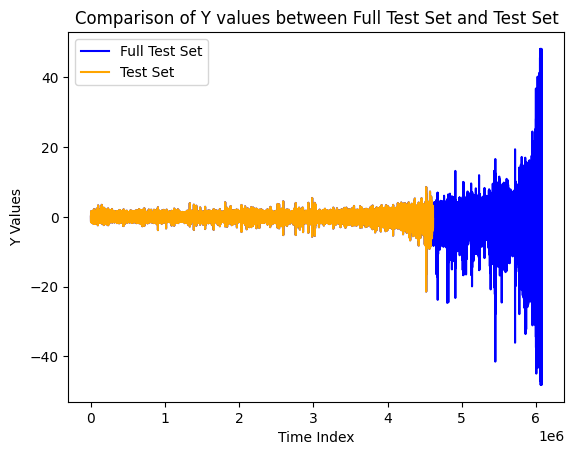

In [21]:
# Seaborn의 line plot을 사용하여 두 데이터셋의 값을 비교하여 그래프로 표현
sns.lineplot(data=combined_data2, x=combined_data2.index, y=combined_data2[4], color='blue', label='Full Test Set')
sns.lineplot(data=combined_data3, x=combined_data3.index, y=combined_data3[4], color='orange', label='Test Set')

# 그래프 설정
plt.xlabel('Time Index')
plt.ylabel('Y Values')
plt.title('Comparison of Y values between Full Test Set and Test Set')

# 범례 추가
plt.legend()

# 그래프 보이기
plt.show()